<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train an MLP for Handwritten Digit Classification

#Task 1: Data Loading and Preprocessing

In [15]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


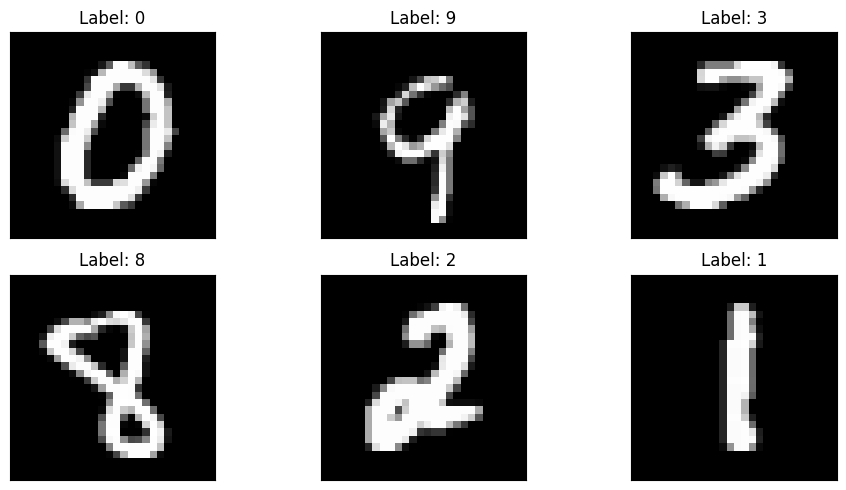

In [14]:
# Task 1: Data Loading and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

# Visualize some training examples
plt.figure(figsize=(10, 5))
examples = iter(train_loader)
example_data, example_targets = next(examples)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Label: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

#Task 2: Define MLP Model

In [16]:
# Task 2: Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.layers(x)
        return x

# Initialize the model, loss function, and optimizer
model = MLP()

# Task 3: Training Loop Implementation

In [17]:
# Task 3: Training Loop Implementation
#RELu introduces not Linear
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 5
train_losses = []
train_counter = []
test_losses = []
test_counter = []
accuracy_list = []

def train(epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
            train_losses.append(loss.item())
            train_counter.append((batch_idx * 64) + ((epoch - 1) * len(train_loader.dataset)))

    return running_loss / len(train_loader)

def test():
    model.eval()
    test_loss = 0
    correct = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_preds.extend(pred.view(-1).tolist())
            all_targets.extend(target.tolist())

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')

    test_losses.append(test_loss)
    accuracy_list.append(accuracy)

    return test_loss, accuracy, all_preds, all_targets

# Task 4: Model Evaluation and Visualization

In [21]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.141843
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.032276
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.213953
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.086434
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.148208
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.244217
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.131320
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.089940
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.181870
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.134678
Epoch 1/5 - Train Loss: 0.1240 - Test Loss: 0.0906 - Acc: 97.23%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.029601
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.046460
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.146896
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.133502
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.072031
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.133316
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.144916
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.350146
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.2371

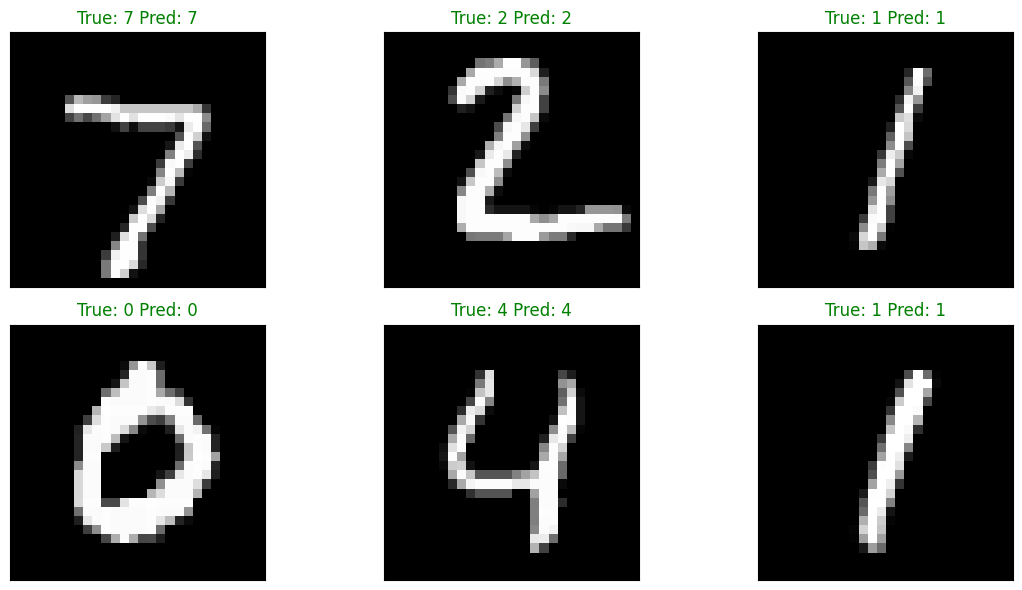

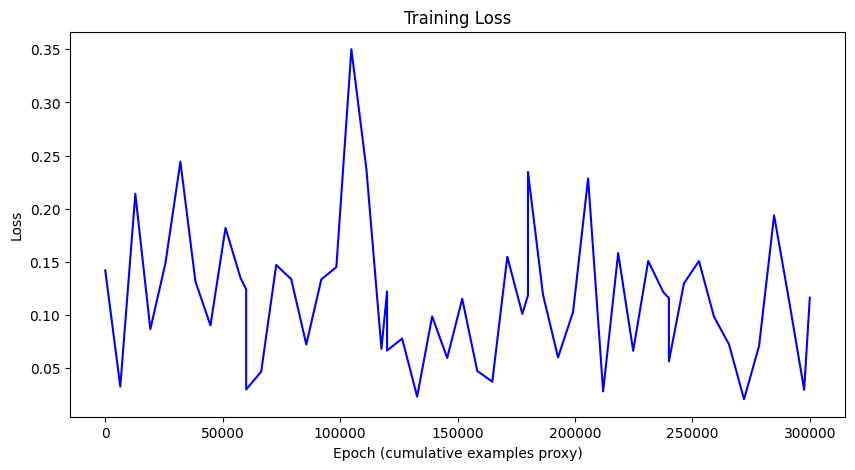

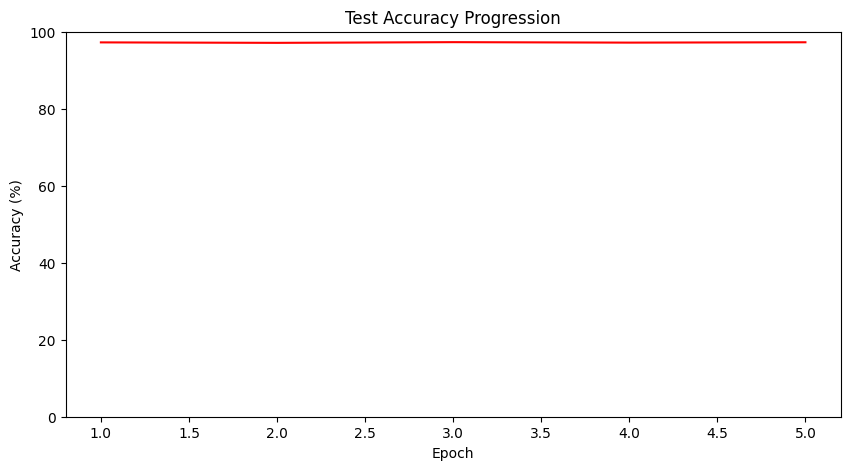

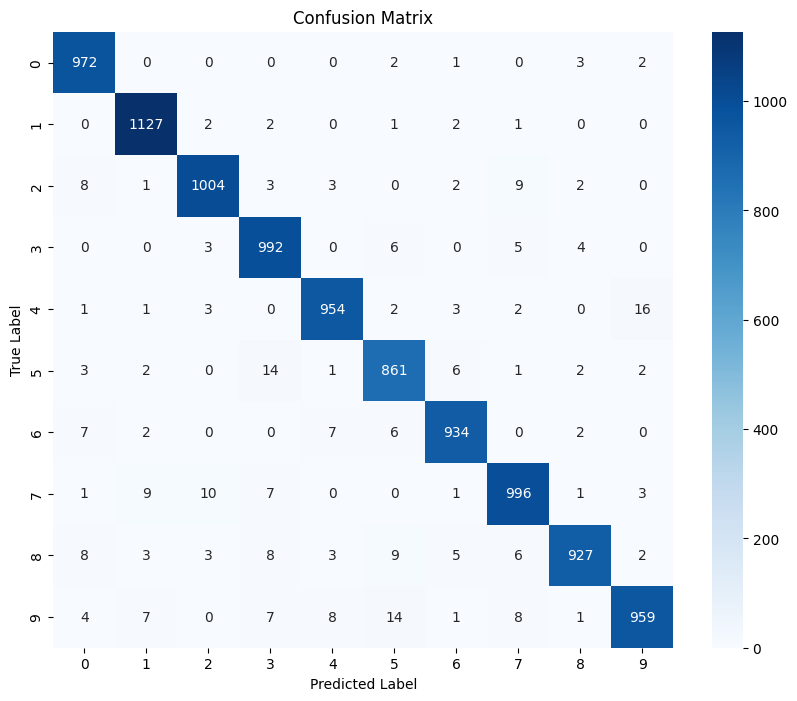

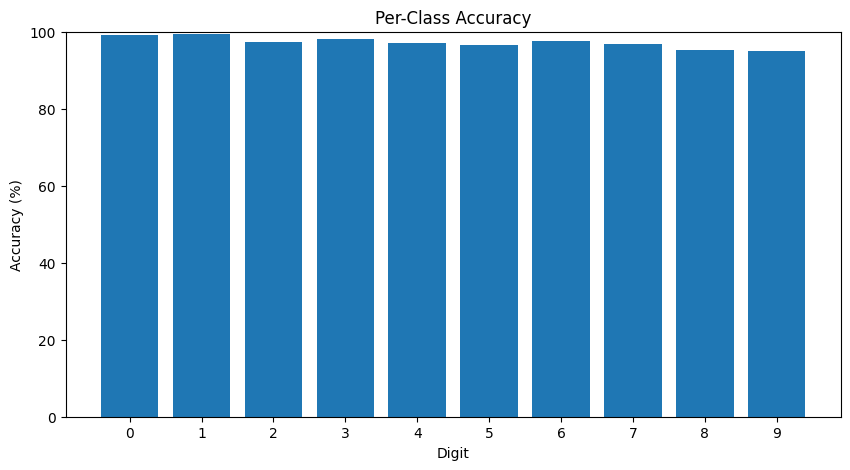

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# If you're using seaborn for heatmap:
import seaborn as sns


# -------------------------
# Test (NO internal logging)
# -------------------------
def test():
    model.eval()
    test_loss = 0.0
    correct = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            output = model(data)

            # If you're using NLLLoss with log_softmax in model:
            # test_loss += F.nll_loss(output, target, reduction='sum').item()
            #
            # If you're using CrossEntropyLoss (more common):
            test_loss += criterion(output, target).item() * data.size(0)

            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()

            all_preds.append(pred.detach().cpu().numpy())
            all_targets.append(target.detach().cpu().numpy())

    test_loss /= len(test_loader.dataset)
    accuracy = 100.0 * correct / len(test_loader.dataset)

    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)

    return test_loss, accuracy, all_preds, all_targets


# --------------------------------
# Visualize predictions (unchanged)
# --------------------------------
def visualize_predictions(num_images=6):
    model.eval()
    with torch.no_grad():
        data, target = next(iter(test_loader))
        data, target = data.to(device), target.to(device)

        output = model(data)
        pred = output.argmax(dim=1).view(-1)

        fig = plt.figure(figsize=(12, 6))
        for idx in range(num_images):
            ax = fig.add_subplot(2, 3, idx + 1)
            ax.imshow(data[idx][0].detach().cpu(), cmap='gray')
            color = 'green' if pred[idx].item() == target[idx].item() else 'red'
            ax.set_title(
                f"True: {target[idx].item()} Pred: {pred[idx].item()}",
                color=color
            )
            ax.set_xticks([])
            ax.set_yticks([])
        plt.tight_layout()
        plt.show()


# -------------------------
# Training + evaluation loop
# -------------------------
train_losses = []
train_counter = []
accuracy_list = []

# If you use "train_counter" like in common MNIST examples, make sure these exist:
# train_loader.batch_size and len(train_loader.dataset) are used below.
seen = 0

for epoch in range(1, epochs + 1):
    avg_loss = train(epoch)  # train() should return average loss for the epoch
    train_losses.append(avg_loss)

    # Track how many examples have been seen so far (optional)
    seen += len(train_loader.dataset)
    train_counter.append(seen)

    # Evaluate ONCE per epoch and log accuracy ONCE per epoch
    test_loss, accuracy, _, _ = test()
    accuracy_list.append(accuracy)

    print(f"Epoch {epoch}/{epochs} - Train Loss: {avg_loss:.4f} - Test Loss: {test_loss:.4f} - Acc: {accuracy:.2f}%")


# -------------------------
# Visualize some predictions
# -------------------------
visualize_predictions()


# -------------------------
# Plot training loss
# -------------------------
plt.figure(figsize=(10, 5))
plt.plot(train_counter, train_losses, color='blue')
plt.xlabel('Epoch (cumulative examples proxy)')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# -------------------------
# Plot accuracy progression
# -------------------------
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), accuracy_list, color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Progression')
plt.ylim(0, 100)
plt.show()


# -------------------------
# Confusion matrix + per-class accuracy
# -------------------------
def plot_confusion_matrix(preds, targets):
    cm = confusion_matrix(targets, preds)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Per-class accuracy
    per_class_accuracy = 100 * np.diag(cm) / np.sum(cm, axis=1)

    plt.figure(figsize=(10, 5))
    plt.bar(range(10), per_class_accuracy)
    plt.xlabel('Digit')
    plt.ylabel('Accuracy (%)')
    plt.title('Per-Class Accuracy')
    plt.xticks(range(10))
    plt.ylim(0, 100)
    plt.show()


# Run a final test pass for confusion matrix (does NOT affect accuracy_list)
_, _, all_preds, all_targets = test()
plot_confusion_matrix(all_preds, all_targets)
